In [60]:
import numpy as np
import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer

if __name__ == '__main__':
    data_dir = 'data_reviews'
    x_train_df = pd.read_csv(os.path.join(data_dir, 'x_train.csv'))
    y_train_df = pd.read_csv(os.path.join(data_dir, 'y_train.csv'))

In [61]:
#load data into python
x_train_df = pd.read_csv('data_reviews/x_train.csv')
#concatenating review to make string processing easier
tr_list_of_sentences = x_train_df['text'].str.cat(sep='\n')
#tr_list_of_sentences

In [62]:
#interesting model stuff
import sklearn
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import loguniform
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [63]:
y_train_df = pd.read_csv('data_reviews/y_train.csv')
y_tr_N = y_train_df.is_positive_sentiment.values.astype(float)

# Preprocessing

In [64]:
'''
Steps:
1. Remove all non-alpha numeric characters from the string
2. Remove stop words
3. Correct spelling

'''

'\nSteps:\n1. Remove all non-alpha numeric characters from the string\n2. Remove stop words\n3. Correct spelling\n\n'

In [65]:
#remove all non-alpha numeric characters from the string
import re

In [66]:
#using regex to remove non_alphanum
def remove_non_alpha_num(reviews_string):
    s = re.sub(r'[!]', ' ! ', reviews_string)
    s = re.sub(r'[?]', ' ? ', s)
    s = re.sub(r'[.]', ' ', s)
    s = re.sub(r'[^A-Za-z\'\n\s!?]+', '', s)
    s = s.lower()
    return s
               
    
    

In [67]:
#Unit Tests
remove_non_alpha_num("can't.do this")
#remove_non_alpha_num("!?hello *&*^*^")

"can't do this"

In [68]:
#remove stop words
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet


In [69]:
#stop_words

In [70]:
stop_words = set(stopwords.words('english'))
stop_words = {word.replace("'", '') for word in stop_words}
toRemove = {"not", "couldn't", "shouldn't", "didn't", "doesn't", "don't", "wasn't", "wouldn't", "won't", "again"}
for entry in toRemove:
    stop_words.discard(entry)

In [71]:
#https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
def remove_stop_words(reviews_string, remove_words):
    reviews_list = reviews_string.split('\n')
    filtered_sentences = []
    for review in reviews_list:
        r = review.split()
        filtered_words = [w for w in r if w not in remove_words]
        filtered_sentence = ' '.join(filtered_words)
        filtered_sentences.append(filtered_sentence)
    
    filtered_sentences = '\n'.join(filtered_sentences)
    return filtered_sentences
    

In [72]:

#using the approach from lab
def tokenize_text(raw_text):
    ''' Transform a plain-text string into a list of tokens
    
    We assume that *whitespace* divides tokens.
    
    Args
    ----
    raw_text : string
    
    Returns
    -------
    list_of_tokens : list of strings
        Each element is one token in the provided text
    '''
    list_of_tokens = raw_text.split() # split method divides on whitespace by default
    for pp in range(len(list_of_tokens)):
        cur_token = list_of_tokens[pp]
        # Remove punctuation
        for punc in ['_', '.', ',', '"', '/']:
            cur_token = cur_token.replace(punc, "")
        # Turn to lower case
        clean_token = cur_token.lower()
        # Replace the cleaned token into the original list
        list_of_tokens[pp] = clean_token
    return list_of_tokens

In [73]:
tokenize_text(" ! ")

['!']

In [74]:
from spellchecker import SpellChecker

In [75]:
#correct spelling
#https://pyspellchecker.readthedocs.io/en/latest/
def correct_spelling(reviews_string):
    reviews_list = reviews_string.split('\n')
    correctly_spelled_sentences = []
    
    speller = SpellChecker()
    
    for review in reviews_list:
        words = review.split()
        correctly_spelled_words = [speller.correction(word) if speller.correction(word) is not None else word for word in words]
        correct_sentence = ' '.join(correctly_spelled_words)
        correctly_spelled_sentences.append(correct_sentence)
    
    corrected_reviews_string = '\n'.join(correctly_spelled_sentences)
    return corrected_reviews_string


In [76]:
import nltk
#nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

In [77]:
nltk.pos_tag(["beautiful"])[0][1][0]

'N'

In [78]:
#https://www.geeksforgeeks.org/part-speech-tagging-stop-words-using-nltk-python/
#nltk.pos_tag(["hello"])[0][1][0].lower()
def get_pos_tag(word):
    word_tag = nltk.pos_tag([word])[0][1][0].lower()
    tag_dict = {"j": wordnet.ADJ, "n": wordnet.NOUN, "v": wordnet.VERB, "r": wordnet.ADV}
    
    return tag_dict.get(word_tag, "n")


In [79]:
def lemmatize_words(reviews_string):
    reviews_list = reviews_string.split('\n')
    wnl = WordNetLemmatizer()
    
    
    lemmatized_text = [" ".join([wnl.lemmatize(word, get_pos_tag(word)) for word in tokenize_text(review)]) for review in reviews_list]
    
    lemmatized_data = "\n".join(lemmatized_text)
    
    return lemmatized_data



In [80]:
#The following code is from the Bag of Words Lab

def create_tok_count(list_of_sentences):
    
    tok_count_dict = dict()

    for line in list_of_sentences:
        tok_list = tokenize_text(line)
        for tok in tok_list:
            if tok in tok_count_dict:
                tok_count_dict[tok] += 1
            else:
                tok_count_dict[tok] = 1
                    
    return tok_count_dict

In [81]:
import afinn

In [82]:

from afinn import Afinn

def determine_sentiment(word):
    afinn = Afinn()
    score = afinn.score(word)
    
    if score > 0:
        return 1  # Positive sentiment
    elif score < 0:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral/Indeterminate sentiment



In [83]:
# Example usage
word = "okay"
result = determine_sentiment(word)
print(result)  # 1 for positive sentiment

0


In [84]:
FREQ_THRESHOLD = 2
def build_vocab_list(reviews_string):
    list_of_sentences = reviews_string.split('\n')
    
    tok_count_dict = create_tok_count(list_of_sentences)
    sorted_tokens = list(sorted(tok_count_dict, key=tok_count_dict.get, reverse=True))
    
    vocab_list = [w for w in sorted_tokens[:] if ((tok_count_dict[w] >= FREQ_THRESHOLD) or (determine_sentiment(w) != 0))]
    #vocab_list = [w for w in sorted_tokens[:] if ((tok_count_dict[w] >= FREQ_THRESHOLD))]
    
    vocab_dict = dict()
    for vocab_id, tok in enumerate(vocab_list):
        vocab_dict[tok] = vocab_id
    
    return vocab_dict, len(list_of_sentences), len(vocab_list)
    

In [85]:

# list_of_sentences = reviews_string.split('\n')
    
# tok_count_dict = create_tok_count(list_of_sentences)
# sorted_tokens = list(sorted(tok_count_dict, key=tok_count_dict.get, reverse=True))

# vocab_list = [w for w in sorted_tokens[:] if tok_count_dict[w] >= FREQ_THRESHOLD]

# vocab_dict = dict()
# for vocab_id, tok in enumerate(vocab_list):
#     vocab_dict[tok] = vocab_id

    

In [86]:
# tok_count_dict[sorted_tokens[0]]
# sorted_tokens[0]

In [87]:
def transform_text_into_feature_vector(text, vocab_dict):
    ''' Produce count feature vector for provided text
    
    Args
    ----
    text : string
        A string of raw text, representing a single 'review'
    vocab_dict : dict with string keys
        If token is in vocabulary, will exist as key in the dict
        If token is not in vocabulary, will not be in the dict

    Returns
    -------
    count_V : 1D numpy array, shape (V,) = (n_vocab,)
        Count vector, indicating how often each vocab word
        appears in the provided text string
    '''
    V = len(vocab_dict.keys())
    count_V = np.zeros(V)
    for tok in tokenize_text(text):
        if tok in vocab_dict:
            vv = vocab_dict[tok]
            count_V[vv] += 1
    return count_V

In [88]:
#DO NOT TOUCH THESE: THEY TAKE A LONG TIME TO RUN

In [89]:
def preprocess_string(tr_list_of_sentences):
    original_review_string = tr_list_of_sentences
    reviews_string = remove_non_alpha_num(tr_list_of_sentences)
    reviews_string = correct_spelling(reviews_string)
    reviews_string = lemmatize_words(reviews_string)
    reviews_string = remove_stop_words(reviews_string, stop_words)
    return reviews_string, original_review_string

In [90]:

reviews_string, original_review_string = preprocess_string(tr_list_of_sentences)

In [91]:

# original_review_string = tr_list_of_sentences
# reviews_string = remove_non_alpha_num(tr_list_of_sentences)
# reviews_string = correct_spelling(reviews_string)
# reviews_string = lemmatize_words(reviews_string)

In [92]:
# reviews_string = remove_stop_words(reviews_string, stop_words)

In [93]:
#original_review_string = tr_list_of_sentences
# reviews_string

In [94]:
#I think I have just improved the text processing. Let's see what models can do for me now

In [95]:
ngram_tuple = (1, 1)

In [96]:

vectorizer = CountVectorizer(ngram_range = ngram_tuple)
X = vectorizer.fit_transform(reviews_string.split("\n"))
x_prepared_NV = X.toarray()

In [97]:
V = x_prepared_NV.shape[1]
V

3620

In [98]:
vocab_dict, N, V = build_vocab_list(reviews_string)
x_prepared_NV = np.zeros((N, V))
for nn, raw_text_line in enumerate(reviews_string.split("\n")):
    x_prepared_NV[nn] = transform_text_into_feature_vector(raw_text_line, vocab_dict)

# Creating Model

In [99]:
model = sklearn.linear_model.LogisticRegression(solver='lbfgs', max_iter=300)
SEED = 2
FOLDS = 15


In [100]:
cRange = loguniform(1e-3, 1e3)
tol = [0, 1e-1,1e-2,1e-3,1e-4,1e-5]
C_grid = np.logspace(-6, 3, 30)

In [101]:
#solver 'lbfgs' does not support an l1 penalty
distributions = {
    'C': C_grid,
    'penalty': ['l2']
    #'tol': tol,
    #'fit_intercept': [True, False]
}

In [102]:
curr_search = RandomizedSearchCV(
    estimator = model,
    param_distributions = distributions,
    scoring = 'roc_auc',
    cv = FOLDS,
    return_train_score = True
    
    )

In [103]:
import matplotlib
import matplotlib.pyplot as plt

In [104]:
# C_grid = np.logspace(-6, 2, 30)
# C_grid

In [105]:
#all of a sudden this takes a really long time, which is frustrating

In [106]:
curr_search.fit(x_prepared_NV, y_tr_N)

RandomizedSearchCV(cv=15, estimator=LogisticRegression(max_iter=300),
                   param_distributions={'C': array([1.00000000e-06, 2.04335972e-06, 4.17531894e-06, 8.53167852e-06,
       1.74332882e-05, 3.56224789e-05, 7.27895384e-05, 1.48735211e-04,
       3.03919538e-04, 6.21016942e-04, 1.26896100e-03, 2.59294380e-03,
       5.29831691e-03, 1.08263673e-02, 2.21221629e-02, 4.52035366e-02,
       9.23670857e-02, 1.88739182e-01, 3.85662042e-01, 7.88046282e-01,
       1.61026203e+00, 3.29034456e+00, 6.72335754e+00, 1.37382380e+01,
       2.80721620e+01, 5.73615251e+01, 1.17210230e+02, 2.39502662e+02,
       4.89390092e+02, 1.00000000e+03]),
                                        'penalty': ['l2']},
                   return_train_score=True, scoring='roc_auc')

In [107]:
#Best score:
#ngrams: 
# (1, 2) 0.90636
# (2, 2) 0.74 (absolute garbage, clearly I need the 1)
# (1, 3) 0.90410 (I am thinking that anything beyond 2 n grams isn't super helpful)

In [108]:
print('Best params:', curr_search.best_params_)
print('Best score:', curr_search.best_score_)
print('Best pipeline:', curr_search.best_estimator_)
print('Index of best pipeline:', curr_search.best_index_)
results=pd.DataFrame(curr_search.cv_results_)
results #see results of test

Best params: {'penalty': 'l2', 'C': 0.7880462815669921}
Best score: 0.8957291666666667
Best pipeline: LogisticRegression(C=0.7880462815669921, max_iter=300)
Index of best pipeline: 8


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,param_C,params,split0_test_score,split1_test_score,split2_test_score,...,split7_train_score,split8_train_score,split9_train_score,split10_train_score,split11_train_score,split12_train_score,split13_train_score,split14_train_score,mean_train_score,std_train_score
0,0.035647,0.006019,0.001883,0.000257,l2,0.000304,"{'penalty': 'l2', 'C': 0.0003039195382313198}",0.839688,0.894375,0.881406,...,0.859207,0.857821,0.859856,0.862045,0.860215,0.858873,0.856602,0.858687,0.858293,0.002224
1,0.020201,0.001282,0.001711,0.000107,l2,0.000002,"{'penalty': 'l2', 'C': 2.0433597178569437e-06}",0.837969,0.893437,0.880469,...,0.857960,0.856576,0.858645,0.861220,0.859208,0.857871,0.855454,0.857628,0.857170,0.002298
2,0.021703,0.002052,0.001741,0.000137,l2,0.000004,"{'penalty': 'l2', 'C': 4.1753189365604e-06}",0.837969,0.893437,0.880469,...,0.857960,0.856576,0.858645,0.861220,0.859208,0.857871,0.855454,0.857628,0.857170,0.002298
3,0.021449,0.002208,0.001777,0.000205,l2,0.000017,"{'penalty': 'l2', 'C': 1.7433288221999873e-05}",0.837969,0.893437,0.880469,...,0.857971,0.856579,0.858648,0.861220,0.859211,0.857871,0.855454,0.857630,0.857172,0.002299
4,0.472536,0.039210,0.001916,0.000177,l2,117.21023,"{'penalty': 'l2', 'C': 117.21022975334793}",0.870156,0.898125,0.872188,...,0.999795,0.999847,0.999899,0.999954,0.999860,0.999820,0.999929,0.999841,0.999865,0.000054
5,0.111741,0.013643,0.002221,0.000434,l2,0.385662,"{'penalty': 'l2', 'C': 0.38566204211634725}",0.934063,0.959375,0.926094,...,0.970525,0.970863,0.970698,0.970783,0.970552,0.970794,0.970648,0.970448,0.970659,0.000561
6,0.319254,0.033486,0.002416,0.000340,l2,13.738238,"{'penalty': 'l2', 'C': 13.738237958832638}",0.905625,0.931875,0.911406,...,0.997710,0.998062,0.998161,0.998366,0.997928,0.998106,0.998284,0.997910,0.998165,0.000299
7,0.029262,0.000930,0.001850,0.000160,l2,0.002593,"{'penalty': 'l2', 'C': 0.002592943797404667}",0.844375,0.899219,0.887500,...,0.869227,0.868378,0.870654,0.871201,0.870587,0.869523,0.867650,0.869943,0.868903,0.001997
8,0.120939,0.010113,0.002004,0.000324,l2,0.788046,"{'penalty': 'l2', 'C': 0.7880462815669921}",0.935625,0.960000,0.926094,...,0.980931,0.981882,0.981803,0.981663,0.980937,0.981665,0.981615,0.981001,0.981543,0.000513
9,0.034658,0.002661,0.002012,0.000191,l2,0.000621,"{'penalty': 'l2', 'C': 0.0006210169418915617}",0.840156,0.895312,0.882031,...,0.860600,0.859371,0.861377,0.863259,0.861639,0.860277,0.858182,0.860189,0.859765,0.002176


In [109]:
final_model = sklearn.linear_model.LogisticRegression(C=1.6102620275609392, penalty='l2', solver='lbfgs', max_iter=300)

In [110]:
final_model.fit(x_prepared_NV, y_tr_N)

LogisticRegression(C=1.6102620275609392, max_iter=300)

In [111]:
# results['param_C']

In [112]:
# results['mean_test_score']

In [113]:
# results['mean_train_score']

In [114]:
sorted_indices = np.argsort(results['param_C'])

(1e-06, 100.0)

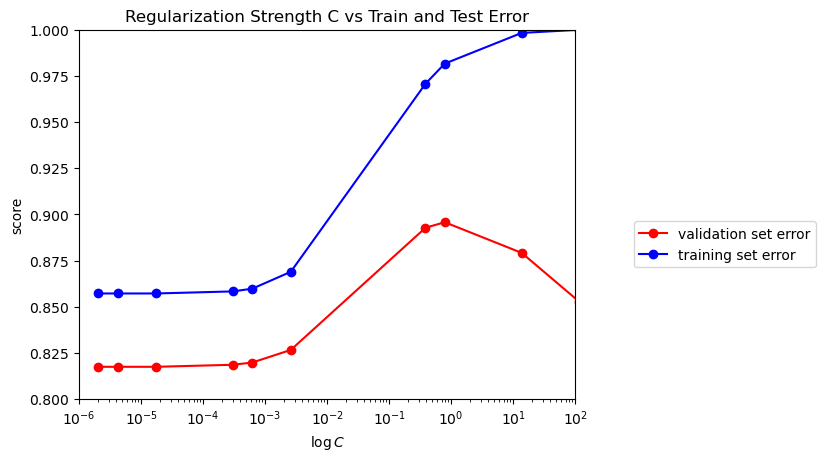

In [116]:
plt.plot(results['param_C'][sorted_indices], results['mean_test_score'][sorted_indices], 'r-o', label='validation set error')
plt.plot(results['param_C'][sorted_indices], results['mean_train_score'][sorted_indices], 'b-o', label='training set error')

plt.title("Regularization Strength C vs Train and Test Error")
plt.xscale("log")
plt.ylabel('score')
plt.xlabel("$\log C$");
plt.legend(bbox_to_anchor=(1.5, 0.5)) # make legend outside plot
plt.ylim([0.8, 1.0]);
plt.xlim([0.000001, 100.0])

In [109]:
#getting a leaderboard score:
x_test_df = pd.read_csv('data_reviews/x_test.csv')
test_list_of_sentences = x_test_df['text'].str.cat(sep='\n')

In [110]:
#cleaning test data

In [111]:
test_list_of_sentences, blah = preprocess_string(test_list_of_sentences)

In [48]:
# test_list_of_sentences = remove_non_alpha_num(test_list_of_sentences)

In [49]:
#test_list_of_sentences = correct_spelling(test_list_of_sentences)

In [50]:
# test_list_of_sentences = remove_stop_words(test_list_of_sentences, stop_words)
#

In [51]:
Y = vectorizer.transform(test_list_of_sentences.split("\n"))
#Y.transform(test_list_of_sentences.split("\n")).toarray()


In [52]:
predict_array = Y.toarray()

In [53]:
# predict_array[:, :].shape

In [113]:
#determining test data size
list_of_sentences2 = test_list_of_sentences.split('\n')
Z = len(list_of_sentences2)
x_tr_ZV = np.zeros((Z, V))

In [114]:
for nn2, raw_text_line2 in enumerate(list_of_sentences2):
    x_tr_ZV[nn2] = transform_text_into_feature_vector(raw_text_line2, vocab_dict)

In [115]:
predict_array = x_tr_ZV

In [165]:
yhat_test_N = final_model.predict_proba(predict_array)

In [166]:
np.savetxt("yproba1_test.txt", yhat_test_N[:, 1])

In [53]:
train_predictions = curr_search.predict(x_prepared_NV)
probas = curr_search.predict_proba(x_prepared_NV)
b = ~np.equal(train_predictions, y_tr_N)
indices = np.flatnonzero(b)
print(len(indices))

67


In [54]:
#ok... so it is only getting 4 wrong! This seems really good... not sure how I'm going to improve this

In [56]:
for i in indices:
    print("Processed Review:")
    print(reviews_string.split("\n")[i])
    #print('\n')
    print("Original Review:")
    print(original_review_string.split("\n")[i])
    #print('\n')
    print("Probability:", probas[i])
    print("Predicted:", train_predictions[i])
    print("Actual:", y_tr_N[i])
    print('\n')
    
    

Processed Review:
really want plantronics right one many issue good
Original Review:
I really wanted the Plantronics 510 to be the right one, but it has too many issues for me.The good
Probability: [0.28737265 0.71262735]
Predicted: 1.0
Actual: 0.0


Processed Review:
excellent starter wireless headset
Original Review:
Excellent starter wireless headset.
Probability: [0.13333199 0.86666801]
Predicted: 1.0
Actual: 0.0


Processed Review:
phone year tell not great
Original Review:
I have had this phone for over a year now, and I will tell you, its not that great.
Probability: [0.3936173 0.6063827]
Predicted: 1.0
Actual: 0.0


Processed Review:
loudspeaker option great bumper light appeal
Original Review:
The loudspeaker option is great, the bumpers with the lights is very ... appealing.
Probability: [0.3208149 0.6791851]
Predicted: 1.0
Actual: 0.0


Processed Review:
plan use car forget
Original Review:
If you plan to use this in a car forget about it.
Probability: [0.47611825 0.52388175

In [729]:

test_string = "Plan on ordering from them again and again."
#preprocess_string(test_string)
reviews_string3 = test_string

In [730]:
reviews_string3 = remove_non_alpha_num(reviews_string3)
reviews_string3

'plan on ordering from them again and again '

In [731]:
reviews_string3 = correct_spelling(reviews_string3)
reviews_string3

'plan on ordering from them again and again'

In [732]:
reviews_string3 = lemmatize_words(reviews_string3)
reviews_string3

'plan on order from them again and again'

In [734]:
reviews_string3 = remove_stop_words(reviews_string3, stop_words)
reviews_string3

'plan order'